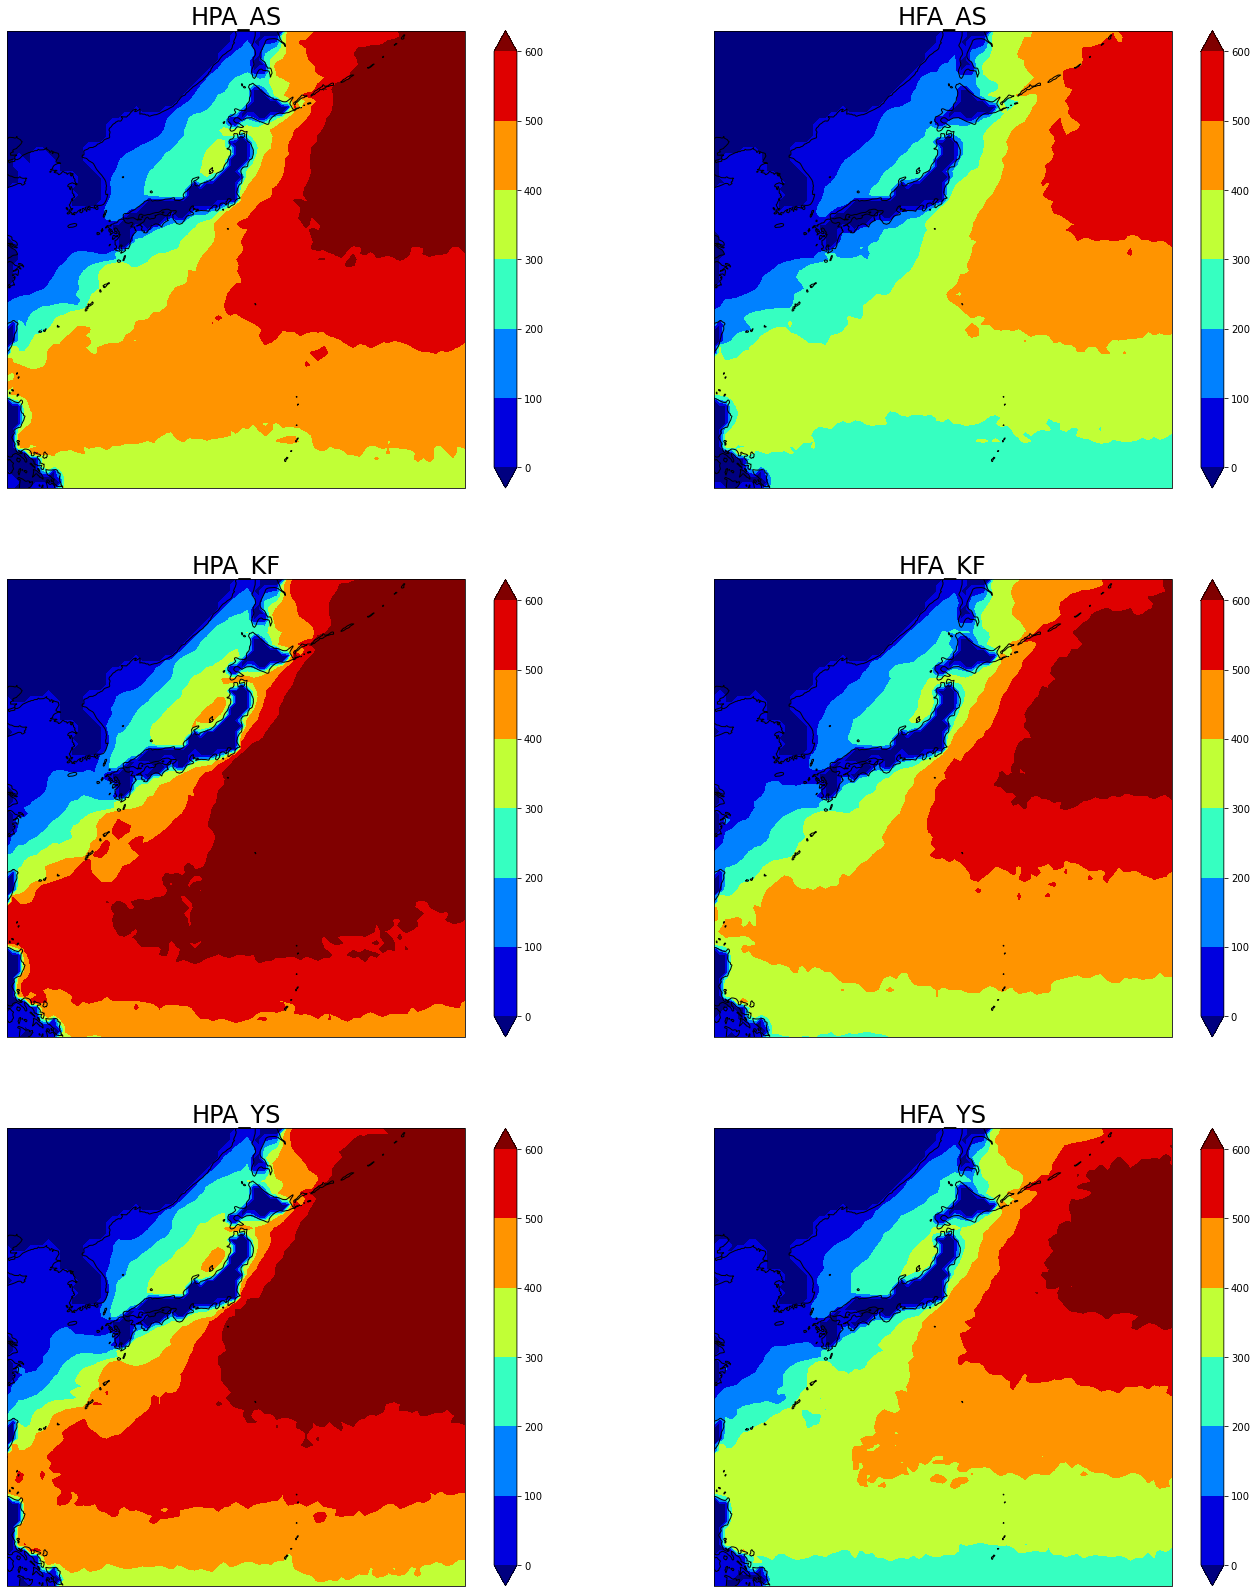

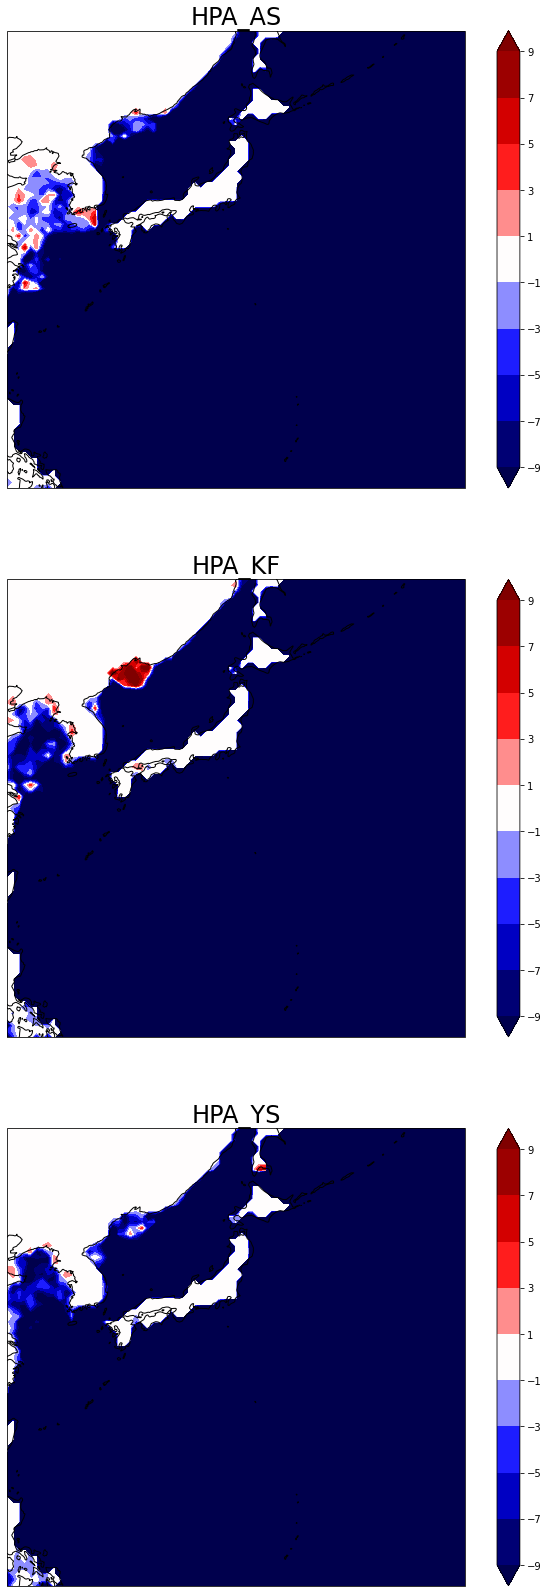

In [3]:
import cartopy.crs as ccrs
import csv
from csv import reader
import numpy as np
import matplotlib.pyplot as plt
import copy
import matplotlib as mpl

def read_pot_cnt(path):
    with open(path, 'r') as csv_file:
        res = list(csv.reader(csv_file))
    # POTの読み込み
    pot_count = np.zeros((79, 79))
    for i in range(len(res)):
        pot_count[i // 79][i % 79] = len(res[i])

    return pot_count
    
# 緯度経度の設定
with open('../lats.csv', 'r') as csv_file:
    csv_reader = reader(csv_file)
    lats = list(csv_reader)
with open('../lons.csv', 'r') as csv_file:
    csv_reader = reader(csv_file)
    lons = list(csv_reader)

for i in range(79):
    for j in range(79):
        lats[i][j] = float(lats[i][j])
        lons[i][j] = float(lons[i][j])

lat_s = lats[0][0]
lat_n = lats[0][-1]
lon_w = lons[0][0]
lon_e = lons[-1][0]

MODEL = ['HPA_AS', 'HPA_KF', 'HPA_YS', 'HFA_AS_c0', 'HFA_KF_c0', 'HFA_YS_c0']
p_as = read_pot_cnt('../pot_csv/HPA_AS_POT.csv')
p_kf = read_pot_cnt('../pot_csv/HPA_KF_POT.csv')
p_ys = read_pot_cnt('../pot_csv/HPA_YS_POT.csv')
f_as = read_pot_cnt('../pot_csv/HFA_AS_c0_POT.csv')
f_kf = read_pot_cnt('../pot_csv/HFA_KF_c0_POT.csv')
f_ys = read_pot_cnt('../pot_csv/HFA_YS_c0_POT.csv')


# 描画(現在気候のRV)
fig = plt.figure(figsize=(20, 24))
levels = np.arange(0, 700, 100)
ax1 = fig.add_subplot(3, 2, 1, projection=ccrs.PlateCarree())
a = plt.contourf(lons, lats, p_as, levels=levels, transform=ccrs.PlateCarree(), cmap='jet', extend='both')
c_bar = plt.colorbar(a)
ax1.coastlines()
ax1.set_title('HPA_AS', fontsize=24)

ax2 = fig.add_subplot(3, 2, 3, projection=ccrs.PlateCarree()) 
a = plt.contourf(lons, lats, p_kf, levels=levels, transform=ccrs.PlateCarree(), cmap='jet', extend='both')
c_bar = plt.colorbar(a)
ax2.coastlines()
ax2.set_title('HPA_KF', fontsize=24)

ax3 = fig.add_subplot(3, 2, 5, projection=ccrs.PlateCarree()) 
a = plt.contourf(lons, lats, p_ys, levels=levels, transform=ccrs.PlateCarree(), cmap='jet', extend='both')
c_bar = plt.colorbar(a)
ax3.coastlines()
ax3.set_title('HPA_YS', fontsize=24)

# 描画(将来気候のRV)
ax4 = fig.add_subplot(3, 2, 2, projection=ccrs.PlateCarree())
a = plt.contourf(lons, lats, f_as, levels=levels, transform=ccrs.PlateCarree(), cmap='jet', extend='both')
c_bar = plt.colorbar(a)
ax4.coastlines()
ax4.set_title('HFA_AS', fontsize=24)

ax5 = fig.add_subplot(3, 2, 4, projection=ccrs.PlateCarree()) 
a = plt.contourf(lons, lats, f_kf, levels=levels, transform=ccrs.PlateCarree(), cmap='jet', extend='both')
c_bar = plt.colorbar(a)
ax5.coastlines()
ax5.set_title('HFA_KF', fontsize=24)

ax6 = fig.add_subplot(3, 2, 6, projection=ccrs.PlateCarree()) 
a = plt.contourf(lons, lats, f_ys, levels=levels, transform=ccrs.PlateCarree(), cmap='jet', extend='both')
c_bar = plt.colorbar(a)
ax6.coastlines()
ax6.set_title('HFA_YS', fontsize=24)
plt.subplots_adjust(left=0.05, right=0.95, bottom=0.05, top=0.95)
plt.savefig("../img/現在気候と将来気候の閾値超過データ数.png")
plt.show()

# 描画(将来気候と現在気候の最大波高の差)
fig = plt.figure(figsize=(10, 24))
levels = np.arange(-9, 10, 2)
cmap = copy.copy(mpl.cm.get_cmap("seismic"))
print(cmap)
ax1 = fig.add_subplot(3, 1, 1, projection=ccrs.PlateCarree())
a = plt.contourf(lons, lats, f_as - p_as, levels=levels, transform=ccrs.PlateCarree(), cmap=cmap, extend='both')
c_bar = plt.colorbar(a)
ax1.coastlines()
ax1.set_title('AS', fontsize=24)

ax2 = fig.add_subplot(3, 1, 2, projection=ccrs.PlateCarree()) 
a = plt.contourf(lons, lats, f_kf - p_kf, levels=levels, transform=ccrs.PlateCarree(), cmap=cmap, extend='both')
c_bar = plt.colorbar(a)
ax2.coastlines()
ax2.set_title('KF', fontsize=24)

ax3 = fig.add_subplot(3, 1, 3, projection=ccrs.PlateCarree()) 
a = plt.contourf(lons, lats, f_ys - p_ys, levels=levels, transform=ccrs.PlateCarree(), cmap=cmap, extend='both')
c_bar = plt.colorbar(a)
ax3.coastlines()
ax3.set_title('YS', fontsize=24)
plt.subplots_adjust(left=0.05, right=0.95, bottom=0.05, top=0.95)
plt.savefig("../img/閾値超過データ数の変化.png")
plt.show()